<a href="https://colab.research.google.com/github/kislay960/Data-Science-Practice/blob/main/Fashion_MNIST_using_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Input,Convolution2D,MaxPooling2D,Flatten,Dense,Dropout
from keras.utils import np_utils
import tensorflow

In [2]:
x = pd.read_csv('https://raw.githubusercontent.com/kislay960/Data-Science-Practice/main/fashion-mnist.csv')
X_ = np.array(x)
X = X_[:,1:]
X = X/255.0
y = X_[:,0]
print(X.shape,y.shape)

(10000, 784) (10000,)


In [3]:
X_train = X.reshape((-1,28,28,1))
Y_train = np_utils.to_categorical(y)

print(X_train.shape,Y_train.shape)

(10000, 28, 28, 1) (10000, 10)


In [4]:
import matplotlib.pyplot as plt

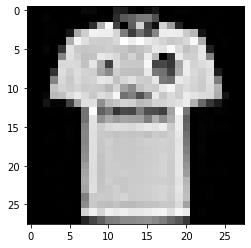

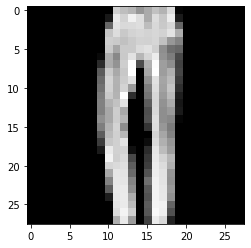

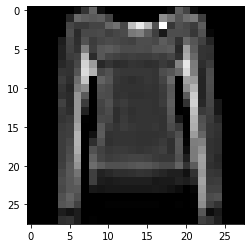

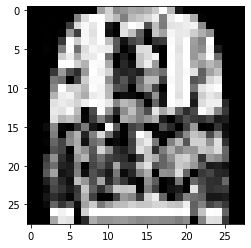

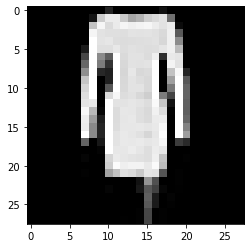

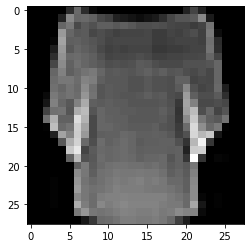

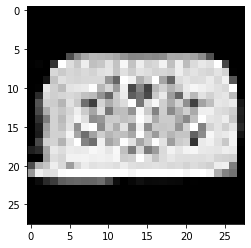

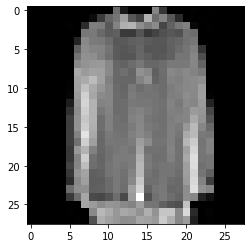

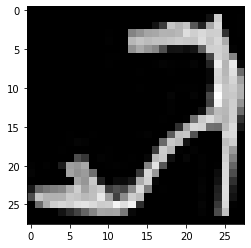

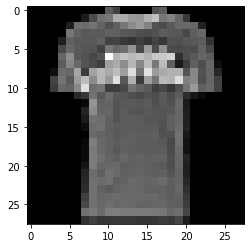

In [7]:
for i in range(10):
    plt.imshow(X_train[i].reshape(28,28),cmap="gray")
    plt.show()

In [8]:
model = Sequential()
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(Convolution2D(64,(3,3),activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(32,(5,5),activation='relu'))
model.add(Convolution2D(8,(5,5),activation='relu'))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 32)          51232     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 8)           6408      
_________________________________________________________________
flatten (Flatten)            (None, 128)               0

In [9]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [10]:
hist = model.fit(X_train,Y_train,epochs=20,shuffle=True,batch_size=256,validation_split=0.20)

Epoch 1/20
32/32 [==============================] - 27s 838ms/step - loss: 1.5778 - accuracy: 0.4399 - val_loss: 0.9136 - val_accuracy: 0.6795
Epoch 2/20
32/32 [==============================] - 27s 833ms/step - loss: 0.7637 - accuracy: 0.7196 - val_loss: 0.7100 - val_accuracy: 0.7540
Epoch 3/20
32/32 [==============================] - 27s 836ms/step - loss: 0.6418 - accuracy: 0.7552 - val_loss: 0.6364 - val_accuracy: 0.7730
Epoch 4/20
32/32 [==============================] - 27s 836ms/step - loss: 0.5631 - accuracy: 0.7944 - val_loss: 0.5592 - val_accuracy: 0.8025
Epoch 5/20
32/32 [==============================] - 27s 831ms/step - loss: 0.5250 - accuracy: 0.8069 - val_loss: 0.5245 - val_accuracy: 0.8175
Epoch 6/20
32/32 [==============================] - 27s 832ms/step - loss: 0.4826 - accuracy: 0.8261 - val_loss: 0.5056 - val_accuracy: 0.8315
Epoch 7/20
32/32 [==============================] - 33s 1s/step - loss: 0.4521 - accuracy: 0.8345 - val_loss: 0.5060 - val_accuracy: 0.8270
Ep

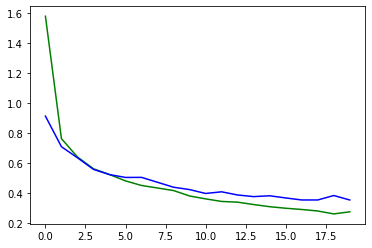

In [13]:
plt.figure(0)
plt.plot(hist.history['loss'],'g')
plt.plot(hist.history['val_loss'],'b')
plt.show()

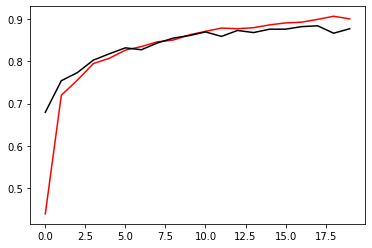

In [14]:
plt.plot(hist.history['accuracy'],'r')
plt.plot(hist.history['val_accuracy'],'black')
plt.show()